# Compare Embedding Models

This notebook walks through how to compare various embedding models with your custom benchmark results.

## 1. Setup

### 1.1 Install & Import

Install the necessary packages.

In [ ]:
%pip install -r requirements.txt

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import json
from functions.utils import *
from functions.visualize import *

### 1.2 Load in Results

In [2]:
with open("results/2025-03-31 14:01:03.json", "r") as f:
    openai_small_results = json.load(f)

with open("results/2025-03-31 13:59:25.json", "r") as f:
    openai_large_results = json.load(f)
    
with open("results/2025-03-31 14:08:55.json", "r") as f:
    jina_results = json.load(f)

with open("results/2025-03-31 14:10:29.json", "r") as f:
    voyage_results = json.load(f)

# Load in the results you wish to compare

In [3]:
results_list = [openai_small_results, openai_large_results, jina_results, voyage_results] # Add as many results as you want to compare

# Create a dataframe of the results
metrics_df = create_metrics_dataframe(results_list)

metrics_df

,Model,Recall@1,Recall@3,Recall@5,Recall@10,Precision@3,Precision@5,Precision@10,NDCG@3,NDCG@5,NDCG@10,MAP@3,MAP@5,MAP@10
0,text-embedding-3-small,0.50000,0.66667,0.69048,0.80952,0.22222,0.13810,0.08095,0.59892,0.60917,0.64652,0.57540,0.58135,0.59613
1,text-embedding-3-large,0.59524,0.71429,0.73810,0.78571,0.23810,0.14762,0.07857,0.66100,0.67125,0.68821,0.64286,0.64881,0.65675
2,jina-embeddings-v3,0.52381,0.59524,0.69048,0.76190,0.19841,0.13810,0.07619,0.56576,0.60469,0.62722,0.55556,0.57698,0.58598
3,voyage-3-large,0.64286,0.76190,0.78571,0.85714,0.25397,0.15714,0.08571,0.70550,0.71575,0.73956,0.68651,0.69246,0.70266


## 2. Compare

<Figure size 1200x600 with 0 Axes>

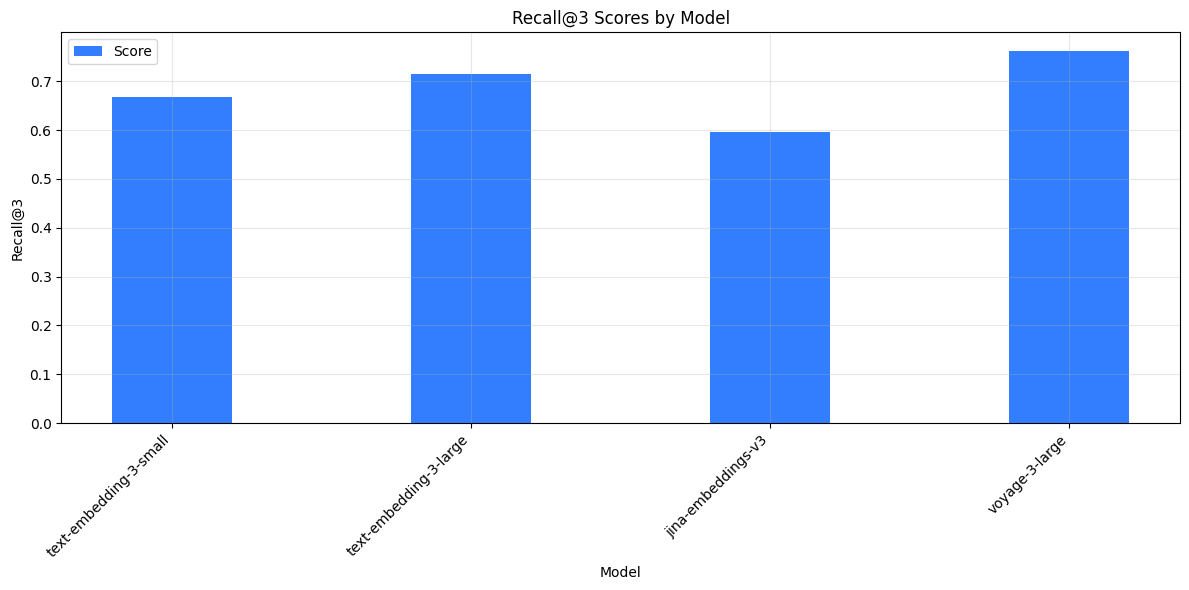

In [4]:
compare_embedding_models(
    metrics_df = metrics_df,
    metric = "Recall@3",
    title = "Recall@3 Scores by Model"
)